In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [3]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iedfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [4]:
from iexfinance.stocks import get_historical_data
import iexfinance as iex

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [5]:
list_of_tickers = ["SPY", "AGG"]
end_date = datetime.now()
start_date = end_date + timedelta(-365)

#
df = get_historical_data(list_of_tickers, start_date, end_date,  output_format='pandas')
df.head()

SPY                                       AGG                  \
              open    high     low   close    volume    open    high     low   
date                                                                           
2018-09-06  289.15  289.49  287.00  288.16  65909863  106.09  106.27  106.09   
2018-09-07  286.98  288.70  286.71  287.60  73524824  105.92  105.94  105.81   
2018-09-10  288.74  289.04  287.88  288.10  50210903  105.85  105.95  105.85   
2018-09-11  287.37  289.55  286.98  289.05  50530492  105.78  105.84  105.70   
2018-09-12  289.06  289.80  288.23  289.12  59810758  105.81  105.89  105.80   

                             
             close   volume  
date                         
2018-09-06  106.19  2248481  
2018-09-07  105.81  2571740  
2018-09-10  105.91  3305683  
2018-09-11  105.73  4918982  
2018-09-12  105.80  4168939

In [6]:
df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
df.head()

,SPY,AGG
,close,close
date,,
2018-09-06,288.16,106.19
2018-09-07,287.60,105.81
2018-09-10,288.10,105.91
2018-09-11,289.05,105.73
2018-09-12,289.12,105.80


# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 100 iterations and generate at least 20 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 20 years

In [7]:
# Calculate the daily roi for the stocks
daily_returns = df.pct_change()
daily_returns.dropna().head()

,SPY,AGG
,close,close
date,,
2018-09-07,-0.001943,-0.003578
2018-09-10,0.001739,0.000945
2018-09-11,0.003297,-0.001700
2018-09-12,0.000242,0.000662
2018-09-13,0.005914,0.000662


In [8]:
# Calculate volatility
std_dev_daily_return_spy = daily_returns.std()['SPY']['close']
std_dev_daily_return_agg = daily_returns.std()['AGG']['close']
std_dev_daily_return_spy

0.010603481484579267

In [9]:
avg_daily_return_spy = daily_returns.mean()['SPY']['close']
avg_daily_return_agg = daily_returns.mean()['AGG']['close']
avg_daily_return_spy

0.0001879738145852361

In [10]:
# Save the last day's closing price

In [11]:
# Setup the Monte Carlo Parameters
number_simulations = 500
num_trading_days = 7560
number_records = num_trading_days * 30
monte_carlo = pd.DataFrame()

simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

spy_close = df['SPY']['close'][-1]
agg_close = df['AGG']['close'][-1]


In [12]:
# Run the Monte Carlo Simulation

for n in range(number_simulations):
    
    simulated_spy_prices = [spy_close]
    simulated_agg_prices = [agg_close]
    
    for i in range(num_trading_days):
        
        # Calculate the simulated price using the last price within the list
        simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_return_spy, std_dev_daily_return_spy))
        simulated_agg_price = simulated_agg_prices[-1] * (1 + np.random.normal(avg_daily_return_agg,std_dev_daily_return_agg))
        
        # Append the simulated price to the list
        simulated_spy_prices.append(simulated_spy_price)
        simulated_agg_prices.append(simulated_agg_price)
    
    # Append a simulated prices of each simulation to DataFrame
    simulated_price_df["SPY prices"] = pd.Series(simulated_spy_prices)
    simulated_price_df["AGG prices"] = pd.Series(simulated_agg_prices)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = simulated_price_df.pct_change()
    
    weights = [0.60, 0.40]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[n] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

# Print records from the DataFrame
portfolio_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003278,0.993776,0.990621,0.998627,1.006080,1.009302,1.012434,0.993455,1.001920,0.998812,...,1.002243,0.994406,1.009175,0.999304,0.996728,1.003437,0.994289,0.990701,1.003864,0.996401
2,1.008772,0.998209,0.988818,0.997578,1.010235,0.996597,1.004739,0.979255,1.000442,1.009943,...,1.004319,1.003694,1.012795,1.000790,0.998114,0.999693,0.993089,0.990995,1.003486,1.000689
3,1.007316,0.997878,0.993111,0.989203,1.009068,1.000872,1.009205,0.971282,0.999716,1.019895,...,1.003848,1.007461,1.018620,1.001998,0.989151,0.997355,0.997218,0.998648,1.007397,0.998298
4,1.018235,1.001163,0.987481,0.996229,1.010168,0.993410,1.006676,0.967648,1.009790,1.005298,...,1.006193,1.004299,1.016195,1.009056,0.996898,0.992938,0.989422,0.998914,1.013262,1.002536


--- 8.627974033355713 seconds ---


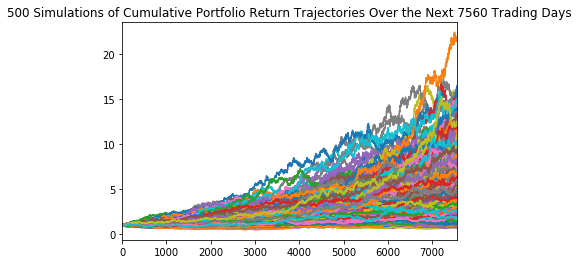

In [13]:
# Visualize the Simulation
start_time = time.time()
plot_title = f"{n+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next {num_trading_days} Trading Days"
portfolio_cumulative_returns.plot(legend=None, title=plot_title)

print("--- %s seconds ---" % (time.time() - start_time))

In [14]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns.head()

0    5.522515
1    4.286308
2    6.576064
3    7.192599
4    6.186753
Name: 7560, dtype: float64

In [15]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
returns_20 = num_trading_days * 20
returns_20_years = portfolio_cumulative_returns.iloc[-1, : returns_20]
#returns_20_years = portfolio_cumulative_returns.iloc[-1, 450]
returns_20_years.head()

0    5.522515
1    4.286308
2    6.576064
3    7.192599
4    6.186753
Name: 7560, dtype: float64

In [16]:
ending_cumulative_returns.value_counts(bins=10) / len(ending_cumulative_returns)

(2.779, 4.85]       0.406
(4.85, 6.922]       0.222
(0.686, 2.779]      0.172
(6.922, 8.993]      0.102
(8.993, 11.064]     0.052
(11.064, 13.136]    0.022
(13.136, 15.207]    0.016
(15.207, 17.279]    0.006
(19.35, 21.422]     0.002
(17.279, 19.35]     0.000
Name: 7560, dtype: float64

In [32]:
def confidence_interval_2(r):
    """Calculate quintile values from decimal confidence interval value"""
    quintile_range_difference = (1-r)
    quintile_range = [(0+quintile_range_difference), (1-quintile_range_difference)]
    
    confidence_interval = ending_cumulative_returns.quantile(q=quintile_range)
    
    ending_cumulative_returns.plot(kind='hist', density=True, bins=10)
    plt.axvline(confidence_interval.iloc[0], color='r')
    plt.axvline(confidence_interval.iloc[1], color='r')

    

None


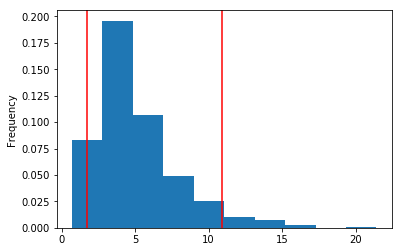

In [18]:
# Display the 90% confidence interval for the ending returns

print(confidence_interval_2(.9))

# Visualize the distribution of the ending returns

---

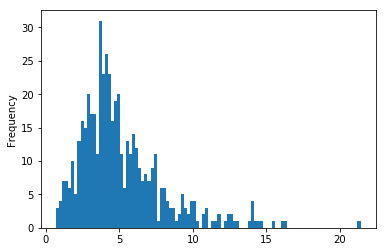

In [19]:
end_returns = portfolio_cumulative_returns.iloc[-1, :]
end_returns.head()
end_returns.plot(kind='hist', bins=100)

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

None
None
None


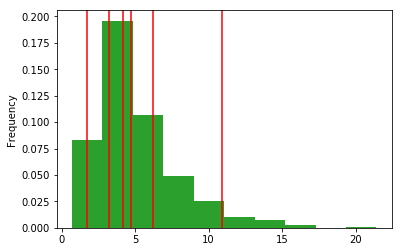

In [20]:
print(confidence_interval_2(.1))
print(confidence_interval_2(.5))
print(confidence_interval_2(.9))

### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [31]:
initial_investment = 20000
def confidence_interval_1(r):
    """Calculate quintile values from decimal confidence interval value"""
    quintile_range_difference = (1-r)
    quintile_range = [(0+quintile_range_difference), (1-quintile_range_difference)]
    
    confidence_interval = ending_cumulative_returns.quantile(q=quintile_range)
    return confidence_interval
    
def expected_returns(p):
    #def confidence_interval_3(r):
        #"""Calculate quintile values from decimal confidence interval value"""
        #quintile_range_difference = (1-r)/2
        #quintile_range = [(0+quintile_range_difference), (1-quintile_range_difference)]
    
        #confidence_interval = ending_cumulative_returns.quantile(q=quintile_range)
        #return confidence_interval
    """Input percentile in decimal to get expected returns range"""
    return confidence_interval_1(p)
    
    investment_pnl_lower_bound = initial_investment * confidence_interval.iloc[0]
    investment_pnl_upper_bound = initial_investment * confidence_interval.iloc[1]
    
    #print(f"There is a {confidence_interval_1}% chance that an initial investment of ${initial_investment} in the portfolio"
    #f" over the next 252 * 3 trading days will end within in the range of"
    #f" ${investment_pnl_lower_bound} and ${investment_pnl_upper_bound}")
    
# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
#investment_pnl_lower_bound = initial_investment * confidence_interval.iloc[0]
#investment_pnl_upper_bound = initial_investment * confidence_interval.iloc[1]
                                                    
# Print the results
#print(f"There is a {confidence_interval_2}% chance that an initial investment of ${initial_investment} in the portfolio"
      #f" over the next 252 * 3 trading days will end within in the range of"
      #f" ${investment_pnl_lower_bound} and ${investment_pnl_upper_bound}")
print(expected_returns(.9)*initial_investment)
print(expected_returns(.5)*initial_investment)
print(expected_returns(.1)*initial_investment)

0.1     45849.423708
0.9    175366.782708
Name: 7560, dtype: float64
0.5    87491.523585
0.5    87491.523585
Name: 7560, dtype: float64
0.9    175366.782708
0.1     45849.423708
Name: 7560, dtype: float64


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [22]:
# YOUR CODE HERE

### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [23]:
# YOUR CODE HERE

### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [24]:
# YOUR CODE HERE